In [1]:
import numpy as np
import pandas as pd

In [2]:
census = pd.read_csv('../data/census_cbg_with_predicted_hesitancy_vaccincation.csv')

In [3]:
census_addition = pd.read_csv('../data/census_level_demographics.csv')

In [4]:
len(census), len(census_addition)

(215196, 220333)

In [5]:
census = census.merge(census_addition[['census_block_group', 'non_hispanic',
 'non_hispanic_white',
 'non_hispanic_black',
 'non_hispanic_indian',
 'non_hispanic_asian',
 'non_hispanic_pacific',
 'hispanic',
 'hispanic_white',
 'hispanic_black',
 'hispanic_indian',
 'hispanic_asian',
 'hispanic_pacific']], on='census_block_group')

In [6]:
len(census), len(census_addition)

(215196, 220333)

In [7]:
for colname in ['non_hispanic',
                 'non_hispanic_white',
                 'non_hispanic_black',
                 'non_hispanic_indian',
                 'non_hispanic_asian',
                 'non_hispanic_pacific',
                 'hispanic',
                 'hispanic_white',
                 'hispanic_black',
                 'hispanic_indian',
                 'hispanic_asian',
                 'hispanic_pacific']:
    census[colname] = census[colname] / census['total_population']

In [8]:
census[['non_hispanic_white', 'non_hispanic_black', 'non_hispanic_indian',
        'non_hispanic_asian', 'non_hispanic_pacific', 'hispanic']]

,non_hispanic_white,non_hispanic_black,non_hispanic_indian,non_hispanic_asian,non_hispanic_pacific,hispanic
0,0.763758,0.214765,0.000000,0.000000,0.000000,0.021477
1,0.826877,0.082213,0.000000,0.007115,0.000000,0.029249
2,0.376042,0.591667,0.000000,0.000000,0.000000,0.013542
3,0.488673,0.461974,0.000000,0.019417,0.000000,0.012136
4,0.626481,0.217851,0.009306,0.011421,0.002538,0.096447
...,...,...,...,...,...,...
215191,0.929307,0.000000,0.000000,0.000000,0.000000,0.021277
215192,0.918642,0.009698,0.004849,0.044720,0.000000,0.018858
215193,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
215194,0.976619,0.000000,0.000000,0.000000,0.000000,0.005396


In [9]:
census['race_other'] = 1 - census['race_white'] - census['race_black']
census['race_asian_pacific'] = census['race_asian'] + census['race_pacific']

In [10]:
cbg2area = np.load('../data/cbg2area.npy', allow_pickle=True).item()

In [11]:
areas = []

for i, row in census.iterrows():
    cbg = row['census_block_group']
    area = cbg2area[cbg]
    areas.append(area)

In [12]:
census['area'] = areas

In [13]:
census['density'] =  census['total_population'] / census['area']

In [15]:
selected_columns = ['age0',
    'age1',
    'age2',
    'age3',
    'age4',
    'age5',
    'age6',
    'age7',
    'age8',
    'non_hispanic_white', 'non_hispanic_black', 'non_hispanic_indian',
    'non_hispanic_asian', 'non_hispanic_pacific', 'hispanic',
    'income_0',
    'income_1',
    'income_2',
    'income_3',
    'income_4',
    'income_5',
    'income_6',
    'income_7',
    'income_8',
    'income_9',
    'income_10',
    'income_11',
    'income_12',
    'income_13',
    'income_14',
    'income_15']

cbg2info = {}

for i, row in census.iterrows():
    cbg2info[row['census_block_group']] = row[selected_columns]

In [16]:
dict_param = np.load('../data/dict_param_all_12.npy', allow_pickle=True).item()

In [17]:
cbg2info_list = [cbg2info[cbg] for cbg in dict_param['all_unique_cbgs']]

In [18]:
for col in selected_columns:
    census[col + '_num'] = census[col] * census['total_population']

In [19]:
census[[col + '_num' for col in selected_columns]].sum()

age0_num                    4.019861e+07
age1_num                    4.603384e+07
age2_num                    3.944105e+07
age3_num                    4.110821e+07
age4_num                    4.134275e+07
age5_num                    4.339374e+07
age6_num                    3.389658e+07
age7_num                    1.888101e+07
age8_num                    1.182071e+07
non_hispanic_white_num      1.965457e+08
non_hispanic_black_num      3.882668e+07
non_hispanic_indian_num     2.074589e+06
non_hispanic_asian_num      1.583934e+07
non_hispanic_pacific_num    3.751200e+05
hispanic_num                5.488441e+07
income_0_num                1.521656e+07
income_1_num                1.013879e+07
income_2_num                1.179016e+07
income_3_num                1.333105e+07
income_4_num                1.362314e+07
income_5_num                1.427821e+07
income_6_num                1.366935e+07
income_7_num                1.390586e+07
income_8_num                1.282597e+07
income_9_num    

In [20]:
import seaborn as sns

sns.set_palette(['#95a5a6', '#34495e', '#3498db', '#9b59b6', '#e74c3c'])

dis = {}

for kk in range(0, 6):
    print(kk)
    if kk == 0:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.63_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                     allow_pickle=True).item()
    else:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.64_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                     allow_pickle=True).item()

    m = result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]
    case_no = m['original'].cbg_infection_count
    for i in range(len(cbg2info_list)):
        r = (np.array([case_no[:, i]]).T @ np.array([cbg2info_list[i]]))
        if i == 0:
            total_r = r
        else:
            total_r += r
    
    res = (total_r/np.array(census[[col + '_num' for col in selected_columns]]).sum(axis=0)).astype(float)
    # res = (total_r).astype(float)
    dis[kk] = res


0
1
2
3
4
5


In [21]:
vax_distribution = np.load('../results/vax_distribution.npy', allow_pickle=True).item()
deciles = np.zeros(len(vax_distribution['original']))

for d in range(0, 100, 10):
    deciles = deciles + (vax_distribution['original'] >= np.percentile(vax_distribution['original'], d)).astype(int)
    
dis2 = {}

for kk in range(0, 6):
    if kk == 0:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.63_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    else:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.64_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    m = result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]
    case_no = m['original'].cbg_infection_count
    
    dis2[kk] = []
    for d in range(1, 11):
        dis2[kk].append((case_no * (deciles == d)).sum(axis=1))

In [22]:
density_distribution = np.zeros(len(vax_distribution['original']))

for i, row in census.iterrows():
    cbg = row['census_block_group']
    density = row['density']
    if cbg in dict_param['cbgs_to_idxs']:
        density_distribution[dict_param['cbgs_to_idxs'][cbg]] = density
    
deciles = np.zeros(len(vax_distribution['original']))

for d in range(0, 100, 10):
    deciles = deciles + (density_distribution >= np.percentile(density_distribution, d)).astype(int)
    
dis3 = {}

for kk in range(0, 6):
    if kk == 0:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.63_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    else:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.64_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    m = result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]
    case_no = m['original'].cbg_infection_count
    
    dis3[kk] = []
    for d in range(1, 11):
        dis3[kk].append((case_no * (deciles == d)).sum(axis=1))

In [23]:
import scipy.stats

scipy.stats.spearmanr(density_distribution, vax_distribution['original'])

SpearmanrResult(correlation=0.20955112189911174, pvalue=0.0)

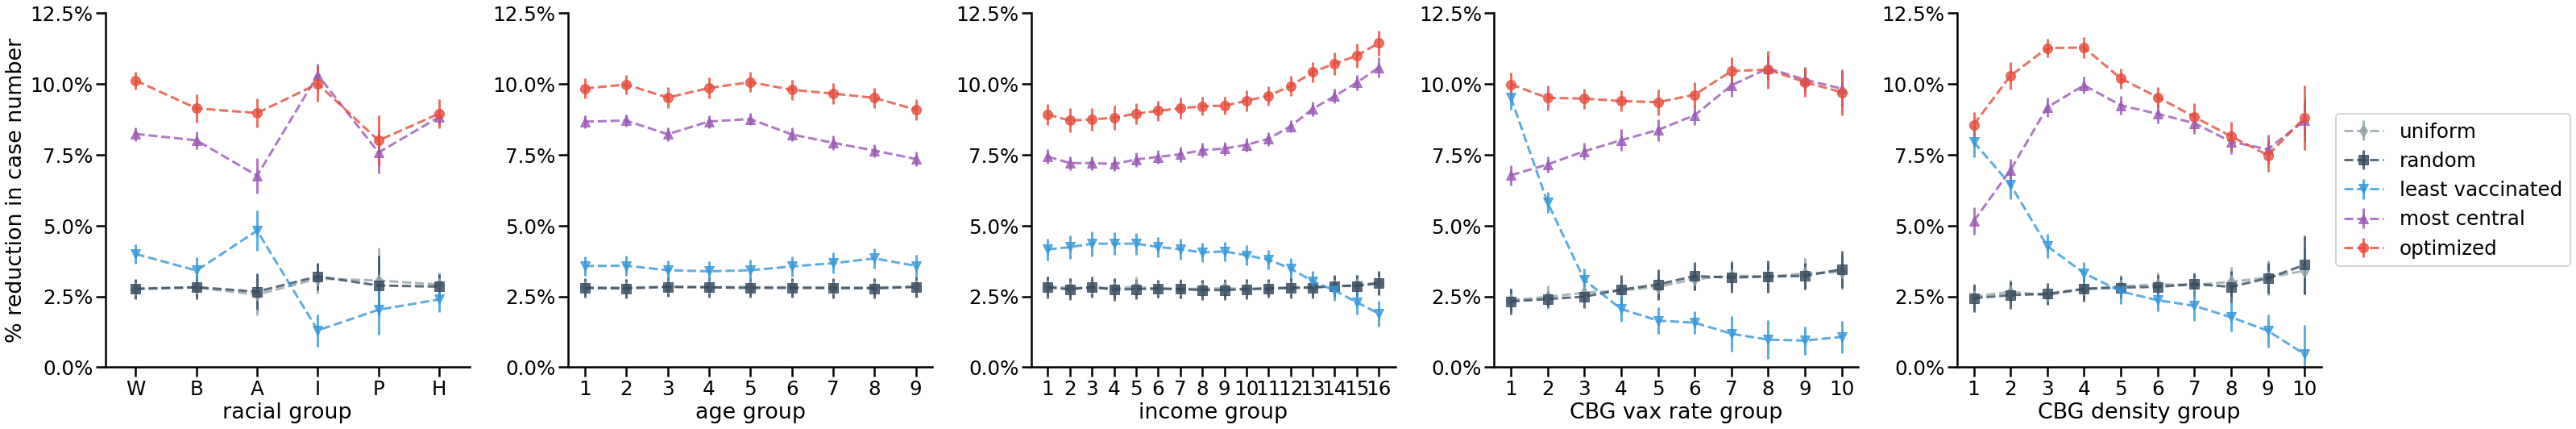

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_context('poster', font_scale=1.12)
fig = plt.figure(figsize=(38+7, 8))
labels = [
    'optimized',
    'most central',
    'least vaccinated',
    'random',
    'uniform'
    ]

import matplotlib.pyplot as plt
markers = ['o', '^', 'v', 's', 'd']

plt.subplot(151)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(6), 
                 ((-dis[kk][:, 9:15] + dis[0][:, 9:15])/dis[0][:, 9:15]).mean(axis=0),
                 yerr=((-dis[kk][:, 9:15] + dis[0][:, 9:15])/dis[0][:, 9:15]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks([0,1,2,3,4,5], ['W', 'B', 'A', 'I', 'P', 'H'])
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)
plt.xlim(-.5, 5.5)
plt.xlabel('racial group')
plt.ylabel('% reduction in case number')

plt.subplot(152)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(9), 
                 ((-dis[kk][:, :9] + dis[0][:, :9])/dis[0][:, :9]).mean(axis=0),
                 yerr=((-dis[kk][:, :9] + dis[0][:, :9])/dis[0][:, :9]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(9), [a for a in range(1, 10)])
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)
plt.xlabel('age group')
# plt.ylabel('% reduction in case number')


plt.subplot(153)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(16), 
                 ((-dis[kk][:, -16:] + dis[0][:, -16:])/dis[0][:, -16:]).mean(axis=0),
                 yerr=((-dis[kk][:, -16:] + dis[0][:, -16:])/dis[0][:, -16:]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(16), [a for a in range(1, 17)], rotation=0)
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)
plt.xlabel('income group')
# plt.ylabel('% reduction in case number')

plt.subplot(154)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(10), 
                 ((-np.array(dis2[kk]) + np.array(dis2[0]))/np.array(dis2[0])).mean(axis=1),
                 yerr=((-np.array(dis2[kk]) + np.array(dis2[0]))/np.array(dis2[0])).std(axis=1),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks(range(10), [a for a in range(1, 11)])
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)

plt.xlabel('CBG vax rate group')

plt.subplot(155)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(10), 
                 ((-np.array(dis3[kk]) + np.array(dis3[0]))/np.array(dis3[0])).mean(axis=1),
                 yerr=((-np.array(dis3[kk]) + np.array(dis3[0]))/np.array(dis3[0])).std(axis=1),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks(range(10), [a for a in range(1, 11)])
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)

# plt.ylabel('% reduction in case number')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('CBG density group')
sns.despine()
plt.tight_layout()
plt.savefig('strategy_segment_revised.pdf')

/tmp/ipykernel_750468/1232143979.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


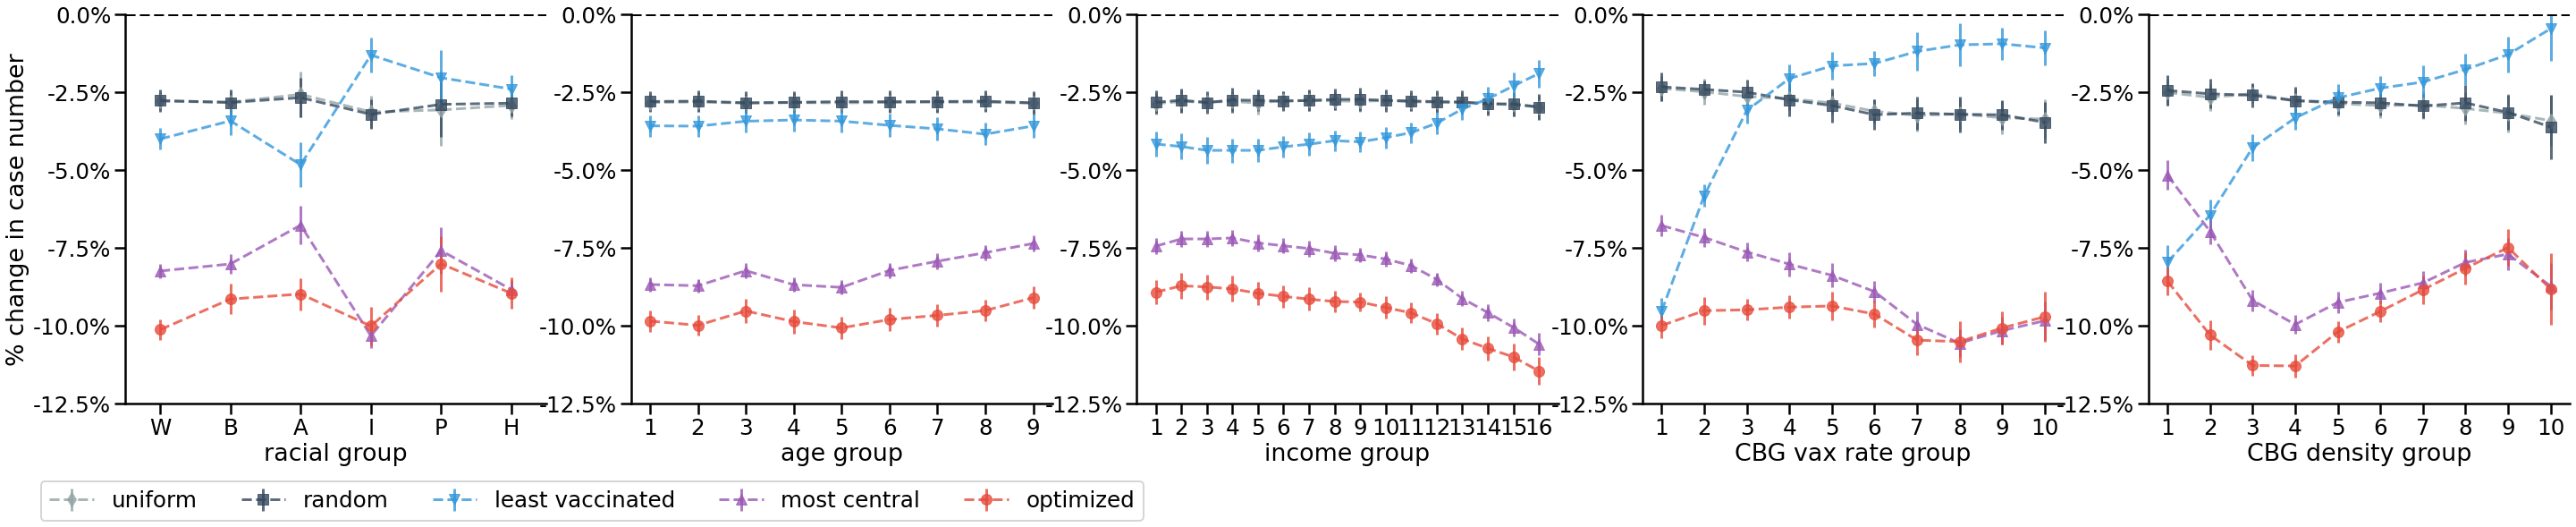

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_context('poster', font_scale=1.12)
fig = plt.figure(figsize=(38+7+4, 8))
labels = [
    'optimized',
    'most central',
    'least vaccinated',
    'random',
    'uniform'
    ]

import matplotlib.pyplot as plt
markers = ['o', '^', 'v', 's', 'd']

plt.subplot(151)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(6), 
                 ((dis[kk][:, 9:15] - dis[0][:, 9:15])/dis[0][:, 9:15]).mean(axis=0),
                 yerr=((dis[kk][:, 9:15] - dis[0][:, 9:15])/dis[0][:, 9:15]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks([0,1,2,3,4,5], ['W', 'B', 'A', 'I', 'P', 'H'])
plt.yticks([-0, -0.025, -0.05, -0.075, -0.1, -0.125],
          ['0.0%', '-2.5%', '-5.0%', '-7.5%', '-10.0%', '-12.5%'])
plt.axhline(0, linestyle='--', color='k')
plt.ylim(-0.125, 0)
plt.xlim(-.5, 5.5)
plt.xlabel('racial group')
plt.ylabel('% change in case number')

plt.subplot(152)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(9), 
                 ((dis[kk][:, :9] - dis[0][:, :9])/dis[0][:, :9]).mean(axis=0),
                 yerr=((dis[kk][:, :9] - dis[0][:, :9])/dis[0][:, :9]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(9), [a for a in range(1, 10)])
plt.yticks([-0, -0.025, -0.05, -0.075, -0.1, -0.125],
          ['0.0%', '-2.5%', '-5.0%', '-7.5%', '-10.0%', '-12.5%'])
plt.axhline(0, linestyle='--', color='k')
plt.ylim(-0.125, 0)
plt.xlabel('age group')
# plt.ylabel('% reduction in case number')


plt.subplot(153)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(16), 
                 ((dis[kk][:, -16:] - dis[0][:, -16:])/dis[0][:, -16:]).mean(axis=0),
                 yerr=((dis[kk][:, -16:] - dis[0][:, -16:])/dis[0][:, -16:]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(16), [a for a in range(1, 17)], rotation=0)
plt.yticks([-0, -0.025, -0.05, -0.075, -0.1, -0.125],
          ['0.0%', '-2.5%', '-5.0%', '-7.5%', '-10.0%', '-12.5%'])
plt.axhline(0, linestyle='--', color='k')
plt.ylim(-0.125, 0)
plt.xlabel('income group')
# plt.ylabel('% reduction in case number')

plt.subplot(154)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(10), 
                 ((np.array(dis2[kk]) - np.array(dis2[0]))/np.array(dis2[0])).mean(axis=1),
                 yerr=((-np.array(dis2[kk]) + np.array(dis2[0]))/np.array(dis2[0])).std(axis=1),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks(range(10), [a for a in range(1, 11)])
plt.yticks([-0, -0.025, -0.05, -0.075, -0.1, -0.125],
          ['0.0%', '-2.5%', '-5.0%', '-7.5%', '-10.0%', '-12.5%'])
plt.axhline(0, linestyle='--', color='k')
plt.ylim(-0.125, 0)

plt.xlabel('CBG vax rate group')

plt.subplot(155)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(10), 
                 ((np.array(dis3[kk]) - np.array(dis3[0]))/np.array(dis3[0])).mean(axis=1),
                 yerr=((-np.array(dis3[kk]) + np.array(dis3[0]))/np.array(dis3[0])).std(axis=1),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks(range(10), [a for a in range(1, 11)])
plt.yticks([-0, -0.025, -0.05, -0.075, -0.1, -0.125],
          ['0.0%', '-2.5%', '-5.0%', '-7.5%', '-10.0%', '-12.5%'])
plt.ylim(-0.125, 0)


plt.xlabel('CBG density group')
sns.despine()

plt.legend(bbox_to_anchor=(-5,-0.25), loc="center left", borderaxespad=0, ncol=5)
plt.tight_layout()
plt.axhline(0, linestyle='--', color='k')
plt.savefig('strategy_segment_revised_minus.pdf')

In [40]:
import seaborn as sns

sns.set_palette(['#95a5a6', '#34495e', '#3498db', '#9b59b6', '#e74c3c'])

dis = {}

for kk in range(0, 6):
    print(kk)
    if kk == 0:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.63_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                     allow_pickle=True).item()
    else:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.64_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                     allow_pickle=True).item()

    m = result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]
    case_no = m['original'].cbg_infection_count
    for i in range(len(cbg2info_list)):
        r = (np.array([case_no[:, i]]).T @ np.array([cbg2info_list[i]]))
        if i == 0:
            total_r = r
        else:
            total_r += r
    
    # res = (total_r/np.array(census[[col + '_num' for col in selected_columns]]).sum(axis=0)).astype(float)
    res = (total_r).astype(float)
    dis[kk] = res
    
vax_distribution = np.load('../results/vax_distribution.npy', allow_pickle=True).item()
deciles = np.zeros(len(vax_distribution['original']))

for d in range(0, 100, 10):
    deciles = deciles + (vax_distribution['original'] >= np.percentile(vax_distribution['original'], d)).astype(int)
    
dis2 = {}

for kk in range(0, 6):
    if kk == 0:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.63_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    else:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.64_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    m = result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]
    case_no = m['original'].cbg_infection_count
    
    dis2[kk] = []
    for d in range(1, 11):
        dis2[kk].append((case_no * (deciles == d)).sum(axis=1))
        
        
density_distribution = np.zeros(len(vax_distribution['original']))

for i, row in census.iterrows():
    cbg = row['census_block_group']
    density = row['density']
    if cbg in dict_param['cbgs_to_idxs']:
        density_distribution[dict_param['cbgs_to_idxs'][cbg]] = density
    
deciles = np.zeros(len(vax_distribution['original']))

for d in range(0, 100, 10):
    deciles = deciles + (density_distribution >= np.percentile(density_distribution, d)).astype(int)
    
dis3 = {}

for kk in range(0, 6):
    if kk == 0:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.63_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    else:
        result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.64_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                         allow_pickle=True).item()
    m = result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]
    case_no = m['original'].cbg_infection_count
    
    dis3[kk] = []
    for d in range(1, 11):
        dis3[kk].append((case_no * (deciles == d)).sum(axis=1))

0
1
2
3
4
5


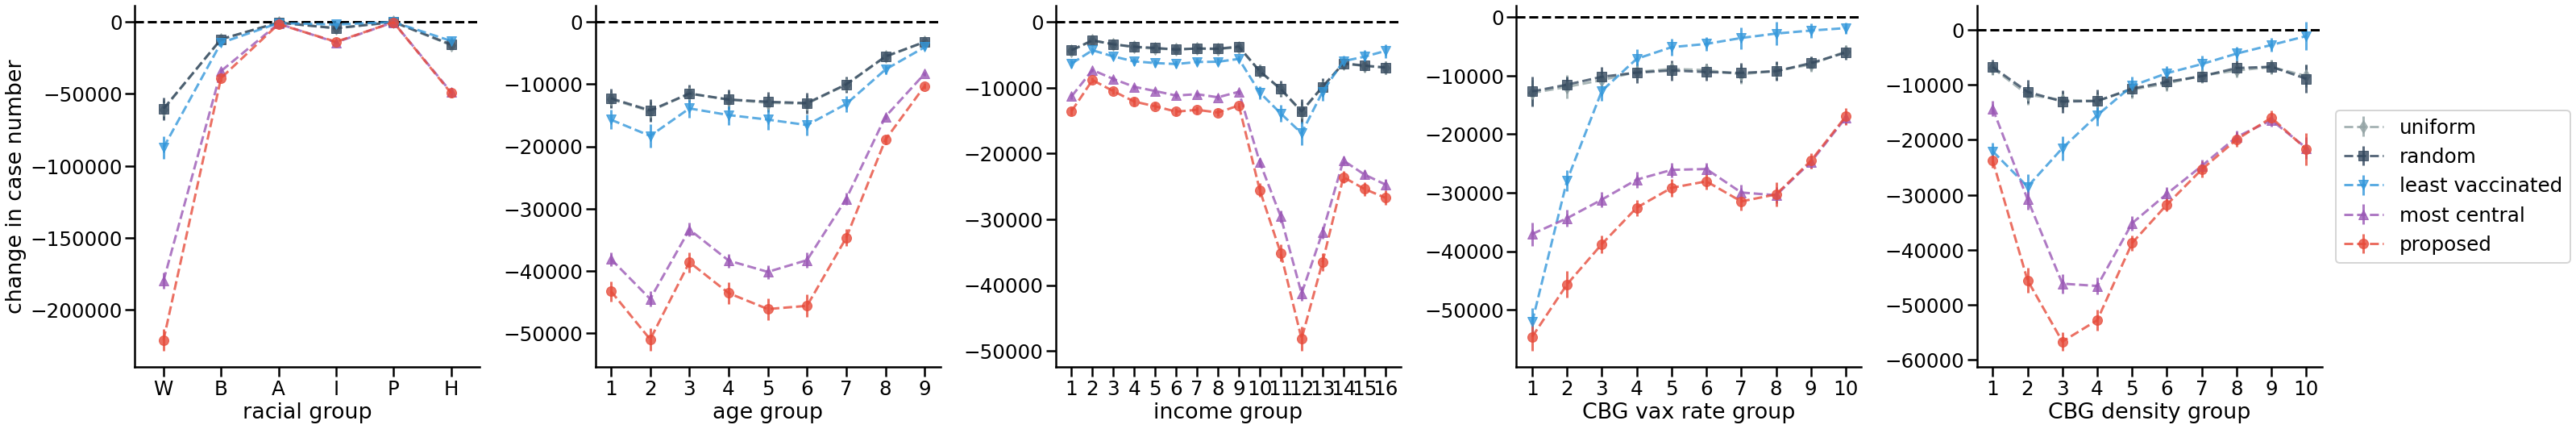

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_context('poster', font_scale=1.12)
fig = plt.figure(figsize=(38+7, 8))
labels = [
    'proposed',
    'most central',
    'least vaccinated',
    'random',
    'uniform'
    ]

import matplotlib.pyplot as plt
markers = ['o', '^', 'v', 's', 'd']

plt.subplot(151)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(6), 
                 ((dis[kk][:, 9:15] - dis[0][:, 9:15])).mean(axis=0),
                 yerr=(-dis[kk][:, 9:15] + dis[0][:, 9:15]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks([0,1,2,3,4,5], ['W', 'B', 'A', 'I', 'P', 'H'])
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
#           ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.axhline(0, linestyle='--', color='k')
plt.xlim(-.5, 5.5)
plt.xlabel('racial group')
plt.ylabel('change in case number')

plt.subplot(152)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(9), 
                 ((dis[kk][:, :9] - dis[0][:, :9])).mean(axis=0),
                 yerr=(-dis[kk][:, :9] + dis[0][:, :9]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(9), [a for a in range(1, 10)])
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
#           ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
# plt.ylim(0, 0.125)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('age group')
# plt.ylabel('% reduction in case number')


plt.subplot(153)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(16), 
                 ((dis[kk][:, -16:] - dis[0][:, -16:])).mean(axis=0),
                 yerr=(-dis[kk][:, -16:] + dis[0][:, -16:]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(16), [a for a in range(1, 17)], rotation=0)
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
#           ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
# plt.ylim(0, 0.125)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('income group')
# plt.ylabel('% reduction in case number')

plt.subplot(154)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(10), 
                 ((np.array(dis2[kk]) - np.array(dis2[0]))).mean(axis=1),
                 yerr=(-np.array(dis2[kk]) + np.array(dis2[0])).std(axis=1),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks(range(10), [a for a in range(1, 11)])
plt.axhline(0, linestyle='--', color='k')
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
#           ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
# plt.ylim(0, 0.125)


plt.xlabel('CBG vax rate group')

plt.subplot(155)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(10), 
                 ((np.array(dis3[kk]) - np.array(dis3[0]))).mean(axis=1),
                 yerr=((-np.array(dis3[kk]) + np.array(dis3[0]))).std(axis=1),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks(range(10), [a for a in range(1, 11)])
plt.axhline(0, linestyle='--', color='k')
# plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
#           ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()

# plt.ylim(0, 0.125)

# plt.ylabel('% reduction in case number')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('CBG density group')
sns.despine()
plt.tight_layout()
plt.savefig('strategy_segment_revised_case_count.pdf')

In [33]:
((-np.array(dis3[kk]) + np.array(dis3[0]))/np.array(dis3[0])).mean(axis=1)

array([0.08562537, 0.1029196 , 0.11270116, 0.11286699, 0.10192191,
       0.09533733, 0.08838663, 0.08149572, 0.07482912, 0.08814325])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_context('poster', font_scale=1.12)
fig = plt.figure(figsize=(38, 8))
labels = [
    'proposed',
    'most central',
    'least vaccinated',
    'random',
    'uniform'
    ]

import matplotlib.pyplot as plt
markers = ['o', '^', 'v', 's', 'd']

plt.subplot(141)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(3), 
                 ((-dis[kk][:, 9:12] + dis[0][:, 9:12])/dis[0][:, 9:12]).mean(axis=0),
                 yerr=((-dis[kk][:, 9:12] + dis[0][:, 9:12])/dis[0][:, 9:12]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks([0,1,2], ['white', 'black', 'other'])
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)
plt.xlim(-.5, 2.5)
plt.xlabel('racial group')
plt.ylabel('% reduction in case number')

plt.subplot(142)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(9), 
                 ((-dis[kk][:, :9] + dis[0][:, :9])/dis[0][:, :9]).mean(axis=0),
                 yerr=((-dis[kk][:, :9] + dis[0][:, :9])/dis[0][:, :9]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(9), [a for a in range(1, 10)])
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)
plt.xlabel('age group')
# plt.ylabel('% reduction in case number')


plt.subplot(143)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(16), 
                 ((-dis[kk][:, -16:] + dis[0][:, -16:])/dis[0][:, -16:]).mean(axis=0),
                 yerr=((-dis[kk][:, -16:] + dis[0][:, -16:])/dis[0][:, -16:]).std(axis=0),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)

plt.xticks(range(16), [a for a in range(1, 17)], rotation=0)
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'])
# plt.legend()
plt.ylim(0, 0.125)
plt.xlabel('income group')
# plt.ylabel('% reduction in case number')

plt.subplot(144)

for kk in [5, 4, 3, 2, 1]:
    plt.errorbar(range(10), 
                 ((-np.array(dis2[kk]) + np.array(dis2[0]))/np.array(dis2[0])).mean(axis=1),
                 yerr=((-np.array(dis2[kk]) + np.array(dis2[0]))/np.array(dis2[0])).std(axis=1),
                 linestyle='--',
                 marker=markers[kk-1],
                 label=labels[kk-1], alpha=0.8)
plt.xticks(range(10), [a for a in range(1, 11)])
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125],
          ['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%'], fontsize)
# plt.legend()
plt.ylim(0, 0.125)

# plt.ylabel('% reduction in case number')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('vaccination rate group')
sns.despine()
plt.tight_layout()
# plt.savefig('strategy_segment.pdf')

In [7]:
vax_distribution = np.load('../results/vax_distribution.npy', allow_pickle=True).item()

In [9]:
intervened_vax_distribution = np.load('../results/campaign/v.npy', allow_pickle=True)

In [22]:
def lorenz_curve(X):
    X_lorenz[0], X_lorenz[-1]
    
    ## scatter plot of Lorenz curve


0.2008394201684358
0.1994022120932144


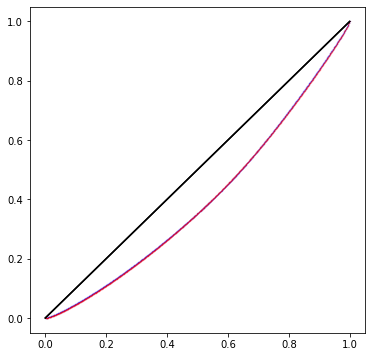

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])

X = np.sort(np.random.choice(vax_distribution['original'], 1000))
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0) 

plt.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='blue', s=.5, alpha=0.5)
plt.plot([0,1], [0,1], color='k')

sorted_arr = vax_distribution['original'].copy()
sorted_arr.sort()
n = vax_distribution['original'].size
coef_ = 2. / n
const_ = (n + 1.) / n
weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
print(coef_*weighted_sum/(sorted_arr.sum()) - const_)

X = np.sort(np.random.choice(vax_distribution['original']+intervened_vax_distribution, 1000))
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0) 

sorted_arr = (vax_distribution['original']+intervened_vax_distribution)
sorted_arr.sort()
n = vax_distribution['original'].size
coef_ = 2. / n
const_ = (n + 1.) / n
weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
print(coef_*weighted_sum/(sorted_arr.sum()) - const_)

plt.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='red', s=.5, alpha=0.5)
plt.plot([0,1], [0,1], color='k')

In [48]:
cbg2info_list[0]

age0          0.115345
age1          0.138002
age2          0.062822
age3           0.07518
age4          0.165808
age5          0.193615
age6          0.129763
age7          0.087539
age8          0.031926
race_white    0.997921
race_black    0.002079
race_other         0.0
income_0      0.007018
income_1      0.007018
income_2      0.024561
income_3      0.038596
income_4      0.010526
income_5      0.042105
income_6      0.073684
income_7      0.017544
income_8      0.017544
income_9      0.091228
income_10     0.136842
income_11     0.263158
income_12     0.161404
income_13     0.021053
income_14     0.077193
income_15     0.010526
Name: 106018, dtype: object

In [54]:
import seaborn as sns


for i in range(len(cbg2info_list)):
    r = vax_distribution['original'][i] * cbg2info_list[i] * dict_param['cbg_sizes'][i]
    if i == 0:
        total_r = r
    else:
        total_r += r

total_r/np.array(census[[col + '_num' for col in selected_columns]]).sum(axis=0)

age0          0.446642
age1          0.444055
age2           0.45357
age3          0.463628
age4          0.470683
age5          0.473413
age6          0.480711
age7          0.481277
age8           0.49152
race_white    0.464482
race_black     0.41162
race_other    0.559248
income_0      0.400344
income_1      0.403398
income_2      0.399631
income_3      0.406634
income_4      0.409587
income_5      0.415755
income_6      0.421251
income_7       0.42373
income_8      0.430235
income_9      0.439201
income_10      0.44889
income_11     0.467195
income_12     0.495437
income_13     0.518611
income_14      0.55159
income_15     0.599797
Name: 106018, dtype: object

In [55]:
import seaborn as sns

sns.set_palette(['#95a5a6', '#34495e', '#3498db', '#9b59b6', '#e74c3c'])


for i in range(len(cbg2info_list)):
    r = (vax_distribution['original'][i]+intervened_vax_distribution[i]) * cbg2info_list[i] * dict_param['cbg_sizes'][i]
    if i == 0:
        total_r = r
    else:
        total_r += r

total_r/np.array(census[[col + '_num' for col in selected_columns]]).sum(axis=0)

age0           0.45687
age1          0.454916
age2          0.462848
age3          0.473903
age4          0.481725
age5          0.483309
age6          0.490009
age7          0.490096
age8          0.498957
race_white    0.474563
race_black    0.420942
race_other     0.56941
income_0       0.40801
income_1      0.410704
income_2      0.406888
income_3      0.413886
income_4      0.417023
income_5      0.423472
income_6      0.429271
income_7      0.432048
income_8      0.438526
income_9      0.447999
income_10     0.458148
income_11     0.477528
income_12     0.507388
income_13     0.531403
income_14     0.565355
income_15     0.614698
Name: 106018, dtype: object

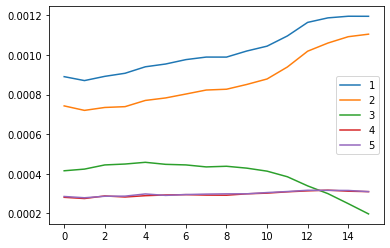

In [17]:
import matplotlib.pyplot as plt

for kk in range(1, 6):
    plt.plot(range(16), -dis[kk][-16:] + dis[0][-16:], label=kk)
    
plt.legend()

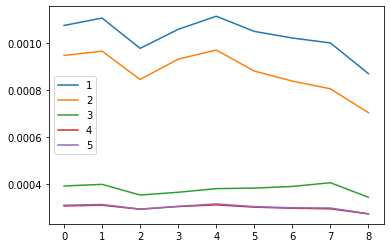

In [18]:
import matplotlib.pyplot as plt

for kk in range(1, 6):
    plt.plot(range(9), -dis[kk][:9] + dis[0][:9], label=kk)
    
plt.legend()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))

sns.set_context('poster', font_scale=1.5)
sns.set_palette(['#95a5a6', '#34495e', '#3498db', '#9b59b6', '#e74c3c'])

plt.bar([0], 
             [1-(res['untarget']['all']['new_cases'][:, :].sum(axis=1) / S).mean()],
             yerr=[(res['untarget']['all']['new_cases'][:, :].sum(axis=1) / S).std()],
            )

plt.bar([1], 
             [1-(res['random']['all']['new_cases'].sum(axis=1) / S).mean()],
             yerr=[(res['random']['all']['new_cases'].sum(axis=1) / S).std()],
            )


plt.bar([2], 
             [1-(res['lowest']['all']['new_cases'].sum(axis=1) / S).mean()],
             yerr=[(res['lowest']['all']['new_cases'].sum(axis=1) / S).std()],
            )

plt.bar([3], 
             [1-(res['centrality']['all']['new_cases'].sum(axis=1) / S).mean()],
             yerr=[(res['centrality']['all']['new_cases'].sum(axis=1) / S).std()],
            )


plt.bar([4], 
             [(1-res['proposed']['all']['new_cases'].sum(axis=1) / S).mean()],
             yerr=[(res['proposed']['all']['new_cases'].sum(axis=1) / S).std()],
            )

print(1-(res['untarget']['all']['new_cases'].sum(axis=1) / S).mean(),
      1-(res['random']['all']['new_cases'].sum(axis=1) / S).mean(),
      1-(res['lowest']['all']['new_cases'].sum(axis=1) / S).mean(),
      1-(res['centrality']['all']['new_cases'].sum(axis=1) / S).mean(),
      1-(res['proposed']['all']['new_cases'].sum(axis=1) / S).mean()
     )

sns.despine()

plt.xticks([0,1,2,3,4], ['uniform', 'random', 'least vaccinated', 'most central', 'proposed'], rotation=30, fontsize=25)
# plt.axhline(1.0, linestyle='--', color='#bdc3c7')
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 
            0.125, 0.150, 0.175, 0.2],
           [
               '0.0%', '2.5%', '5.0%', '7.5%',
               '10.0%', '12.5%', '15.0%', '17.5%', '20.0%']
          )

plt.ylabel('% reduction in case number')
plt.tight_layout()
plt.ylim((0, .1))
plt.savefig('../results/target_720_2022.pdf')

array([ 971, 1180, 1082, ..., 1078, 1272, 2168])

In [30]:
labels = [
    'proposed',
    'high centrality',
    'low vaccination',
    'random targeting',
    'uniform targeting'
    ]

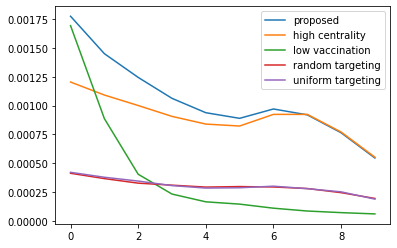

In [31]:
import matplotlib.pyplot as plt

for kk in range(1, 6):
    plt.plot(range(10), -np.array(dis2[kk][:10]) + np.array(dis2[0][:10]), label=labels[kk-1])

plt.xticks(range())

plt.legend()

In [25]:
deciles.min(), deciles.max()

(1.0, 10.0)

In [ ]:
dis = {}

for kk in range(1, 6):
    result = np.load('../results/results_all_original_720_intervene_%d_120000000_0.64_2022_new_natural_imm_perfect_0.700000_given_dis.npy' % (kk), 
                     allow_pickle=True).item()

    m = result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]
    case_no = m['original'].cbg_infection_count.mean(axis=0)
    

    for i in range(len(cbg2info_list)):
        r = cbg2info_list[i] * case_no[i]
        if i == 0:
            total_r = r
        else:
            total_r += r
    
    res = (np.array(total_r) / np.array(census[[col + '_num' for col in selected_columns]].sum()))
    dis[kk] = res

In [16]:
result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]['original']['all']['new_cases']

array([[    0.,    16.,    37., ..., 14089., 13943., 13853.],
       [    0.,    15.,    36., ..., 13770., 13850., 13892.],
       [    0.,    17.,    53., ..., 14047., 13945., 14070.],
       ...,
       [    0.,    20.,    34., ..., 13865., 13972., 13960.],
       [    0.,    21.,    41., ..., 13925., 13867., 13986.],
       [    0.,    25.,    42., ..., 13974., 13961., 13957.]])

In [20]:
dict_param = np.load('../data/dict_param_all_12.npy', allow_pickle=True).item()

In [23]:
dict_param.keys()

dict_keys(['poi_cbg_proportions', 'poi_time_counts', 'poi_areas', 'poi_dwell_time_correction_factors', 'cbg_sizes', 'all_unique_cbgs', 'cbgs_to_idxs', 'all_states', 'poi_cbg_visits_list', 'all_hours', 'cbg_idx_groups_to_track', 'cbg_day_prop_out', 'intervention_cost', 'poi_subcategory_types', 'cbgs_idxs', 'unvax', 'centrality_scores'])

In [27]:
dict_param['poi_cbg_visits_list']

[<4310261x214697 sparse matrix of type '<class 'numpy.int64'>'
 	with 534334166 stored elements in Compressed Sparse Row format>]

In [30]:
result = np.load('../results/results_12_original_720_intervene_0_120000000_0.65_2022_new_natural_imm_perfect_0.700000_given_dis.npy', 
                 allow_pickle=True).item()

In [40]:
result[(-1.0, 0.001, 0.005, 120000000.0, 720, False)]['original'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,